## **Importing Libraries**

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


## **Importing Tweets Dataset**

In [ ]:
tweet_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1jIXcguAMVKSnIDd2phNzjLwhluw1odBc')
tweet_data.head()

,id,tweet,label
0,86426,@USER She should ask a few native Americans wh...,UNT
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN
2,16820,Amazon is investigating Chinese employees who ...,NOT
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT


## **Data Exploration and Preparation**

<Axes: xlabel='label', ylabel='count'>

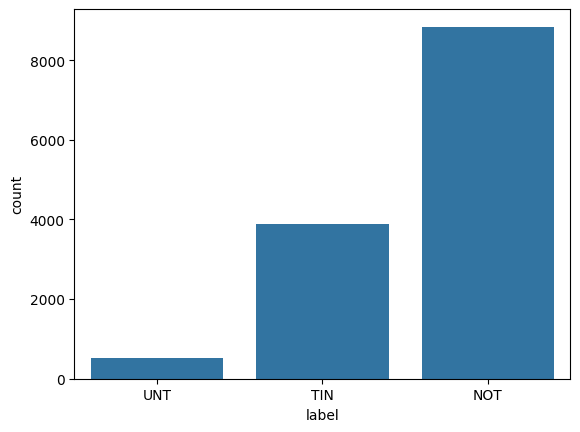

In [ ]:
sns.countplot(x='label', data=tweet_data)

In [ ]:
tweet_data.shape

(13240, 3)

In [ ]:
tweet_data = tweet_data.dropna()
tweet_data.shape

(13240, 3)

## Tokenisation

In [ ]:
# Tokenisation with tweet tokeniser.
tokeniser = TweetTokenizer(strip_handles=True, preserve_case=False)
tokenised_tweets = [tokeniser.tokenize(tweet) for tweet in tweet_data['tweet']]
tokenised_tweets[:2]
print(len(tokenised_tweets))

13240


In [ ]:
tokenised_tweets_sentences = [' '.join(tokens) for tokens in tokenised_tweets]
tweet_data['processed_tweets'] = tokenised_tweets_sentences
tweet_data.head()

,id,tweet,label,processed_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...


## Text Normalisation


### Normal Lemmatisation

In [ ]:
# Converting to base form with Lemmatisation using processed_tweets.
word_lemmatizer = WordNetLemmatizer()
lemmatised_tweets = [[word_lemmatizer.lemmatize(word) for word in tweet.split()] for tweet in tweet_data['processed_tweets']]
lemmatised_tweets_sentences = [' '.join(tokens) for tokens in lemmatised_tweets]
tweet_data['lemmatized_tweets'] = lemmatised_tweets_sentences
tweet_data.head()
# This method didn't converted the words to its base form properly. There are still some words that need to be converted.

,id,tweet,label,processed_tweets,lemmatized_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...


### Spacy Lemmatisation

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
# Converting to base form with Spacy Lemmatisation using processed_tweets.
spacy_tweets = [[token.lemma_ for token in nlp(tweet)] for tweet in tweet_data['processed_tweets']]
spacy_tweets_sentences = [' '.join(tokens) for tokens in spacy_tweets]
tweet_data['spacy_tweets'] = spacy_tweets_sentences
tweet_data.head()
# This method helps in converting some words that were missed by normal Lemmatisation, but missed to convert the words that normal Lemmatisation did.

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...


### Combining Spacy Lemmatisation and Normal Lemmatisation

In [ ]:
# Let's try to combine both methods together by using lemmatized_tweets column instead of processed_tweets.
combined_lemma_tweets = [[token.lemma_ for token in nlp(tweet)] for tweet in tweet_data['lemmatized_tweets']]
combined_lemma_tweets_sentences = [' '.join(tokens) for tokens in combined_lemma_tweets]
tweet_data['combined_lemma_tweets'] = combined_lemma_tweets_sentences
tweet_data.head()

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...


### WordNetLemmatizer with Parts-of-Speech

In [ ]:
# Now Let's also try to convert words to their base form using WordNetLemmatizer with Parts-of-Speech.
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

pos_lemmatised_tweets = [[word_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet.split()] for tweet in tweet_data['processed_tweets']]
pos_lemmatised_tweets_sentences = [' '.join(tokens) for tokens in pos_lemmatised_tweets]
tweet_data['pos_lemmatized_tweets'] = pos_lemmatised_tweets_sentences
tweet_data.head()

# Converting words using WordNetLemmatizer with Part-of-Speech works better compared other methods.

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets,pos_lemmatized_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ’ re drunk ! ! ! #maga #trump2020 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...,obama want liberal & illegals to move into red...


### Word Replacement w.r.t Slang Dictionary

In [ ]:
# Also, as these are tweets, there may be some words in day to slang. So, Let's create a dictionary of slangs.

slang_dict = {
    "$" : " dollar ",
    "£" : " pound ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}


In [ ]:
# Let's check if our tweets has these slangs or not.
from collections import Counter

# Function to find slang words in a tweet
def find_slang_words(text):
    words = text.lower().split()
    return [word for word in words if word in slang_dict]

# Apply function and count slang words
all_slang_words = sum(tweet_data['pos_lemmatized_tweets'].apply(find_slang_words), [])
slang_counts = Counter(all_slang_words)

print(slang_counts)

Counter({'u': 656, 'lol': 213, '$': 106, 'lmao': 60, 'mr': 51, 'ppl': 49, 'omg': 45, 'etc': 34, '£': 34, 'tho': 32, 'pm': 25, 'wtf': 23, 'idk': 21, 'smh': 20, 'tbh': 15, 'btw': 15, 'bout': 10, 'cia': 10, 'fb': 10, 'ily': 8, 'lmfao': 7, 'imo': 7, 'bbc': 7, 'dm': 6, 'asap': 6, 'goat': 6, 'bros': 6, 'poc': 5, 'mf': 5, 'b4': 5, 'fyi': 5, 'app': 5, 'gal': 5, 'og': 4, 'nyc': 4, 'fig': 3, 'u2': 3, 'ft': 3, 'nbc': 3, 'imho': 2, 'cu': 2, 'til': 2, 'cf': 2, 'lb': 2, 'hr': 2, 'jk': 2, 'idc': 2, 'idgaf': 2, 'oc': 2, '€': 2, 'gps': 2, 'pp': 2, 'pov': 2, 'ie': 1, 'pt': 1, 'bae': 1, 'asl': 1, 'm8': 1, 'be4': 1, 'srsly': 1, 'a3': 1, 'thx': 1, 'wb': 1, 'b2b': 1, 'cya': 1, 'blvd': 1, 'eg': 1, 'irl': 1, 'ngl': 1, 'rofl': 1, 'tfw': 1, 'acct': 1, 'nbd': 1})


In [ ]:
# Let's replace the slang words with the appropriate words.
import re

def replace_slang(text, slang_dict):
    pattern = r'(?<!\w)(' + '|'.join(re.escape(word) for word in slang_dict.keys()) + r')(?!\w)'

    def replace_match(match):
        return slang_dict[match.group(0)] if slang_dict[match.group(0)] else match.group(0)

    return re.sub(pattern, replace_match, text)

slang_updated_tweets = [replace_slang(tweet, slang_dict) for tweet in tweet_data['pos_lemmatized_tweets']]
tweet_data['slang_updated_tweets'] = slang_updated_tweets
tweet_data.head()

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets,pos_lemmatized_tweets,slang_updated_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...,obama want liberal & illegals to move into red...,obama want liberal & illegals to move into red...


In [ ]:
# Now Let's re-check if all the slangs have been replaced or not.
all_slang_words = sum(tweet_data['slang_updated_tweets'].apply(find_slang_words), [])
slang_counts = Counter(all_slang_words)
print(slang_counts)

Counter()


In [ ]:
# Now let's perform Feature Extraction using tf-idf vectorization.
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_tweet_data = tfidf_vectorizer.fit(tweet_data['slang_updated_tweets'])
print(f'Features: {tfidf_vectorizer.get_feature_names_out()}\n')

Features: ['00' '000' '00000' ... '𝓭𝔂𝓼𝓹𝓱𝓸𝓻𝓲𝓪' '𝙼𝚌𝙿𝙾𝚄𝚃𝚂𝙵𝚊𝚌𝚎' '𝙿𝚎𝚝𝚊𝚕𝚜']



### Unicode Normalization

In [ ]:
# Oops! We found few fancy words in our dataset, Let's try to convert them to normal words or else they'll create issues.
# Let's handle these words using Unicode Normalization method. We are converting these because, these fancyy words may seem similar, but they hold different unicode patterns.

import unicodedata

def normalize_fancy_text(text):
    return unicodedata.normalize("NFKD", text)

normalized_fancy_tweets = [normalize_fancy_text(tweet) for tweet in tweet_data['slang_updated_tweets']]
tweet_data['normalized_fancy_tweets'] = normalized_fancy_tweets
tweet_data.head()

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...,obama want liberal & illegals to move into red...,obama want liberal & illegals to move into red...,obama want liberal & illegals to move into red...


In [ ]:
print(tweet_data['processed_tweets'][0])

she should ask a few native americans what their take on this is .


### Vectorization

In [ ]:
# Now, Let's do vectorization using tf-idf vectorization method with the updated tweets.
# With 1-grams

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_words)
tfidf_tweet_data = tfidf_vectorizer.fit(tweet_data['normalized_fancy_tweets'])
print(f'Features: {tfidf_vectorizer.get_feature_names_out()}\n')
matrix = tfidf_vectorizer.transform(tweet_data['normalized_fancy_tweets'])
pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

Features: ['00' '000' '00000' ... '더보이즈' '현재' 'ᅮᅳᅮ']



,00,000,00000,01,05,0589,06,07405077156,08,09,...,zombie,zombified,zone,zoom,zuckerberg,ɪs,너의존재가_기적이야,더보이즈,현재,ᅮᅳᅮ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# with 1-grams and 2-grams

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words=stop_words)
tfidf_tweet_data = tfidf_vectorizer.fit(tweet_data['normalized_fancy_tweets'])
print(f'Features: {tfidf_vectorizer.get_feature_names_out()}\n')
matrix = tfidf_vectorizer.transform(tweet_data['normalized_fancy_tweets'])
pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

Features: ['00' '00 must' '00 obviously' ... '현재 gio' '현재 현재' 'ᅮᅳᅮ']



,00,00 must,00 obviously,000,000 call,000 legal,000 period,00000,00000 facebook,01,...,ɪs fɪrst,너의존재가_기적이야,너의존재가_기적이야 url,더보이즈,더보이즈 현재,현재,현재 cherish,현재 gio,현재 현재,ᅮᅳᅮ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# with 2-grams

tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)
tfidf_tweet_data = tfidf_vectorizer.fit(tweet_data['normalized_fancy_tweets'])
print(f'Features: {tfidf_vectorizer.get_feature_names_out()}\n')
matrix = tfidf_vectorizer.transform(tweet_data['normalized_fancy_tweets'])
pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Unable to find much difference

Features: ['00 must' '00 obviously' '000 call' ... '현재 cherish' '현재 gio'
 '현재 현재']



,00 must,00 obviously,000 call,000 legal,000 period,00000 facebook,01 enebot,05 ego,05 narrator,06 star,...,zone tds,zone work,zoom bitch,zuckerberg soros,ɪs fɪrst,너의존재가_기적이야 url,더보이즈 현재,현재 cherish,현재 gio,현재 현재
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# As it is observed that, sparsity is increasing when using more than 1 n-grams and also our dataset only has datas around 13k, It's better to stick on Unigrams.

## **Punctuation Removal**

In [ ]:
# Let's remove punctuations.
import string

remove_punctuation = [text.translate(str.maketrans(dict.fromkeys(string.punctuation))) for text in tweet_data['normalized_fancy_tweets']]
tweet_data['normalized_fancy_tweets'] = remove_punctuation
tweet_data.head()

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk maga trump2020 👊 🇺🇸 ...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...",someone shouldvetaken this piece of shit to a...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...,obama want liberal & illegals to move into red...,obama want liberal & illegals to move into red...,obama want liberal illegals to move into red ...


## **Remove Emojis**

In [ ]:
# Let's remove emojis from the texts.
import re

def remove_emojis(text):
    # Using Regular Expression to match most emojis
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F"
        "\U0001FA70-\U0001FAFF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    return re.sub(emoji_pattern, '', text)
tweet_data['normalized_fancy_tweets'] = tweet_data['normalized_fancy_tweets'].apply(remove_emojis)
tweet_data.head()

,id,tweet,label,processed_tweets,lemmatized_tweets,spacy_tweets,combined_lemma_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native americans what the...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...,she should ask a few native american what thei...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ' re drunk ! ! ! # maga # trump202...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk ! ! ! #maga #trump2020 ...,go home you ’ re drunk maga trump2020 url
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon is investigating chinese employee who a...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,"someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...","someone should'vetaken "" this piece of shit to...",someone shouldvetaken this piece of shit to a...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals & illegals to move into ...,obama wanted liberal & illegals to move into r...,obama want liberal & illegal to move into red ...,obama want liberal & illegal to move into red ...,obama want liberal & illegals to move into red...,obama want liberal & illegals to move into red...,obama want liberal illegals to move into red ...


## **Feature Extraction**

In [ ]:
# Feature Extraction.
final_tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,1))
X = final_tfidf_vectorizer.fit_transform(tweet_data['normalized_fancy_tweets'])
y = tweet_data['label']

### Handling Data Imbalance

In [ ]:
# As we could observe from the Countplot, there is some imbalance in the dataset. So, let's handle this by performing Oversampling.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

## **Splitting Train and Validation Data**

In [ ]:
# Let's split the model and encode.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=123)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)



## **Training and Evaluating Machine Learning Models**

### Logistic Regression

Logistic Regression Accuracy: 0.8152337858220211
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         NOT       0.79      0.71      0.75      2662
         TIN       0.73      0.75      0.74      2625
         UNT       0.92      0.99      0.95      2669

    accuracy                           0.82      7956
   macro avg       0.81      0.81      0.81      7956
weighted avg       0.81      0.82      0.81      7956



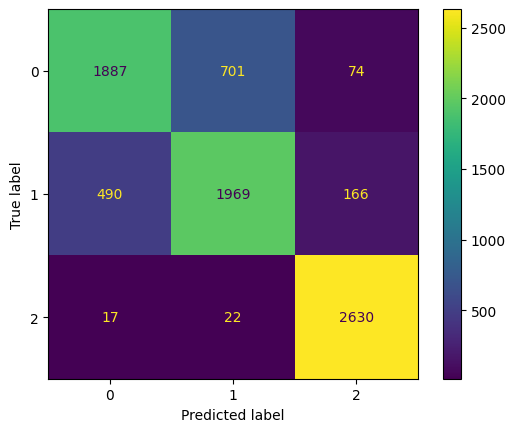

In [ ]:
# Applying Logistic Regression Model.
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(class_weight='balanced')
lgr.fit(X_train, y_train_encoded)
y_pred_encoded = lgr.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=lgr.classes_)
disp.plot()
plt.show()

### Support Vector Machine

SVM Accuracy: 0.8965560583207642
SVM Classification Report:
               precision    recall  f1-score   support

         NOT       0.79      0.95      0.87      2662
         TIN       0.94      0.73      0.83      2625
         UNT       0.99      1.00      0.99      2669

    accuracy                           0.90      7956
   macro avg       0.91      0.90      0.89      7956
weighted avg       0.91      0.90      0.89      7956



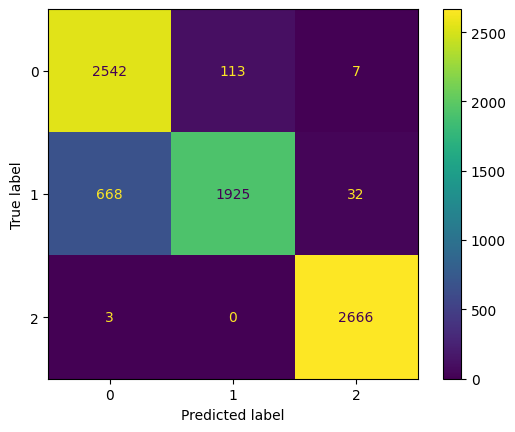

In [ ]:
# Applying Support Vector Machine Model.
from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVM Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

### XG Boost (Extreme Gradient Boosting)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:49:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost Accuracy: 0.7967571644042232
XG Boost Classification Report:
               precision    recall  f1-score   support

         NOT       0.69      0.89      0.78      2662
         TIN       0.81      0.58      0.68      2625
         UNT       0.93      0.91      0.92      2669

    accuracy                           0.80      7956
   macro avg       0.81      0.80      0.79      7956
weighted avg       0.81      0.80      0.79      7956



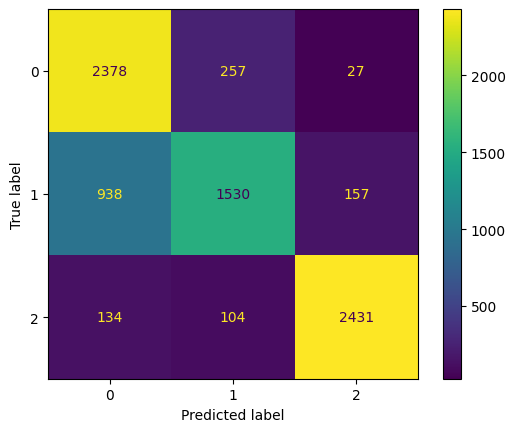

In [ ]:
# Applying XG Boost Model.
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train_encoded)
y_pred_encoded = xgb.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("XG Boost Accuracy:", accuracy_score(y_val, y_pred))
print("XG Boost Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=xgb.classes_)
disp.plot()
plt.show()

### Random Forest Classifier

Random Forest Accuracy: 0.8787078934137758
Random Forest Classification Report:
               precision    recall  f1-score   support

         NOT       0.82      0.83      0.83      2662
         TIN       0.83      0.81      0.82      2625
         UNT       0.99      0.99      0.99      2669

    accuracy                           0.88      7956
   macro avg       0.88      0.88      0.88      7956
weighted avg       0.88      0.88      0.88      7956



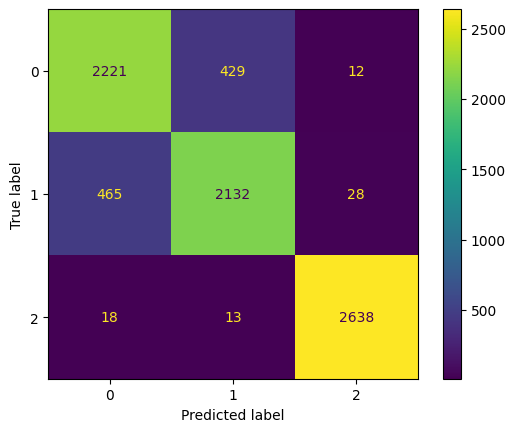

In [ ]:
# Applying Random Forest Classifier Model.
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train_encoded)
y_pred_encoded = rf_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf_model.classes_)
disp.plot()
plt.show()

### Gaussian Naive Bayes

Gaussain Naive Bayes Accuracy: 0.7070135746606335
Gaussain Naive Bayes Classification Report:
               precision    recall  f1-score   support

         NOT       0.83      0.33      0.47      2662
         TIN       0.64      0.79      0.71      2625
         UNT       0.73      1.00      0.85      2669

    accuracy                           0.71      7956
   macro avg       0.73      0.71      0.68      7956
weighted avg       0.73      0.71      0.68      7956



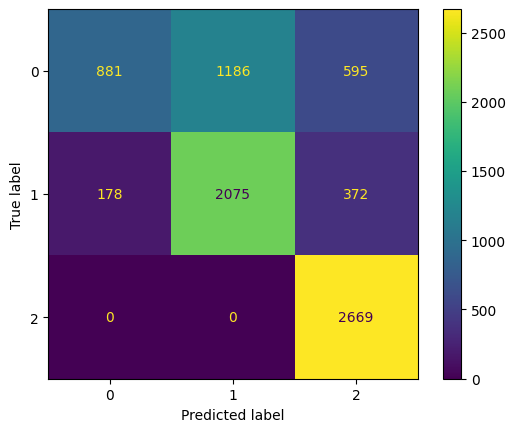

In [ ]:
# Applying Gaussian Naive Bayes Model.
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train_encoded)
y_pred_encoded = nb_model.predict(X_val.toarray())
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("Gaussain Naive Bayes Accuracy:", accuracy_score(y_val, y_pred))
print("Gaussain Naive Bayes Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=nb_model.classes_)
disp.plot()
plt.show()

## **Best Model Selection**
  

*   It can be observed that, SVM gives better results compared to other algorithms.
*   Now let's try to fine tune the model by adjusting Hyperparameters for the model.




### Hyperparameter Tuning

#### Experiment 1

SVM Accuracy: 0.723604826546003
SVMClassification Report:
               precision    recall  f1-score   support

         NOT       0.67      0.70      0.69      2662
         TIN       0.64      0.67      0.65      2625
         UNT       0.88      0.80      0.84      2669

    accuracy                           0.72      7956
   macro avg       0.73      0.72      0.73      7956
weighted avg       0.73      0.72      0.73      7956



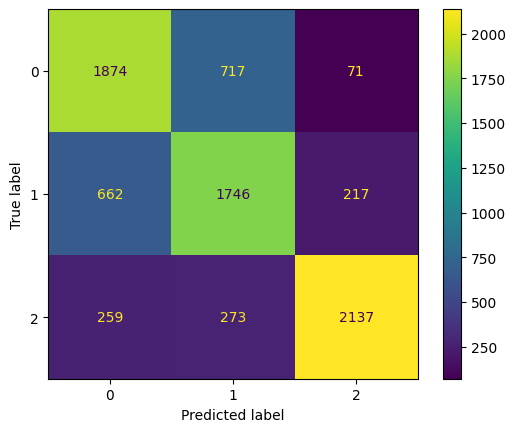

In [ ]:
# Let's set kernel = 'linear', C = 0.1

svm_model = SVC(kernel='linear', C=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVMClassification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 2

SVM Accuracy: 0.6034439416792358
SVM Classification Report:
               precision    recall  f1-score   support

         NOT       0.46      0.99      0.63      2662
         TIN       0.89      0.25      0.39      2625
         UNT       0.97      0.57      0.72      2669

    accuracy                           0.60      7956
   macro avg       0.77      0.60      0.58      7956
weighted avg       0.77      0.60      0.58      7956



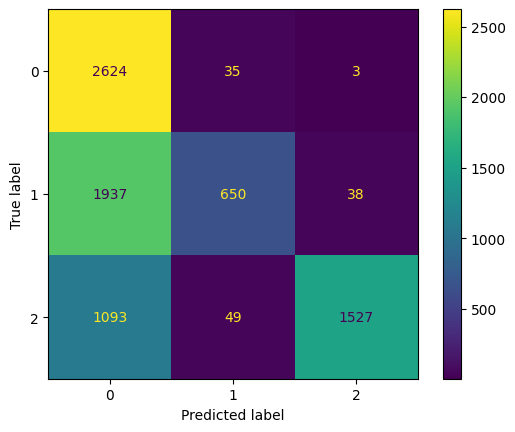

In [ ]:
# Let's set kernel = 'poly', C = 0.1

svm_model = SVC(kernel='poly', C=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVM Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 3

SVM Accuracy: 0.8232780291603821
SVM Classification Report:
               precision    recall  f1-score   support

         NOT       0.80      0.70      0.75      2662
         TIN       0.73      0.77      0.75      2625
         UNT       0.93      0.99      0.96      2669

    accuracy                           0.82      7956
   macro avg       0.82      0.82      0.82      7956
weighted avg       0.82      0.82      0.82      7956



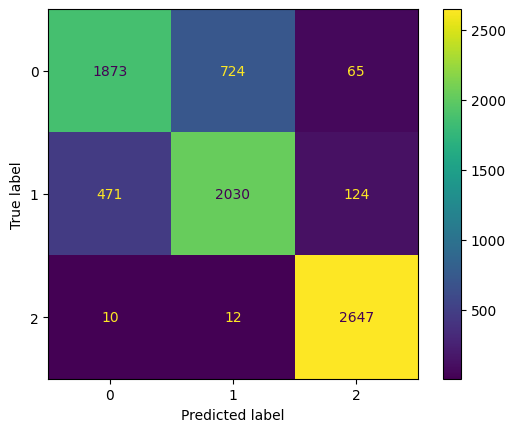

In [ ]:
# Let's set kernel = 'linear', C = 1.0

svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVM Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 4

SVM Accuracy: 0.737430869783811
SVM Classification Report:
               precision    recall  f1-score   support

         NOT       0.92      0.26      0.40      2662
         TIN       0.56      0.96      0.71      2625
         UNT       0.98      0.99      0.99      2669

    accuracy                           0.74      7956
   macro avg       0.82      0.74      0.70      7956
weighted avg       0.82      0.74      0.70      7956



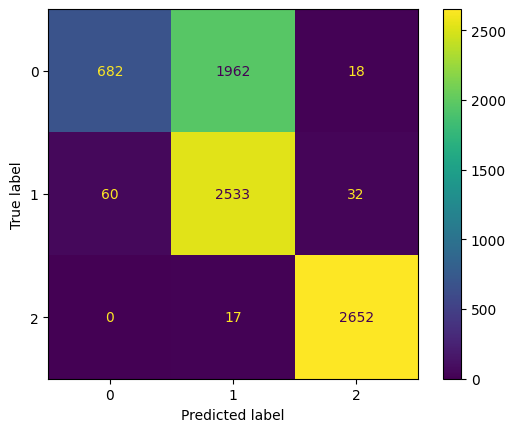

In [ ]:
# Let's set kernel = 'poly', C = 1.0

svm_model = SVC(kernel='poly', C=1.0, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVM Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 5

SVM Accuracy: 0.8334590246354953
SVM Classification Report:
               precision    recall  f1-score   support

         NOT       0.83      0.66      0.74      2662
         TIN       0.73      0.84      0.78      2625
         UNT       0.95      1.00      0.97      2669

    accuracy                           0.83      7956
   macro avg       0.84      0.83      0.83      7956
weighted avg       0.84      0.83      0.83      7956



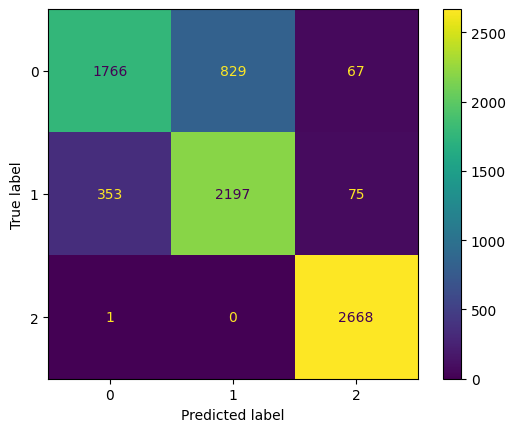

In [ ]:
# Let's set kernel = 'linear', C = 10

svm_model = SVC(kernel='linear', C=10, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVM Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 6

SVM Accuracy: 0.7070135746606335
SVMClassification Report:
               precision    recall  f1-score   support

         NOT       0.93      0.15      0.25      2662
         TIN       0.53      0.98      0.69      2625
         UNT       0.99      1.00      0.99      2669

    accuracy                           0.71      7956
   macro avg       0.82      0.71      0.64      7956
weighted avg       0.82      0.71      0.64      7956



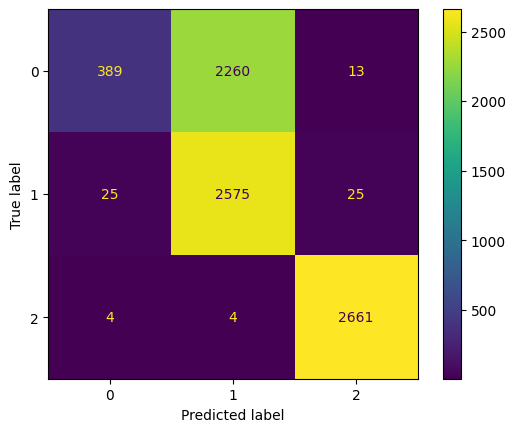

In [ ]:
# Let's set kernel = 'poly', C = 10

svm_model = SVC(kernel='poly', C=10, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVMClassification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 7

SVM Accuracy: 0.7481146304675717
SVMClassification Report:
               precision    recall  f1-score   support

         NOT       0.61      0.99      0.75      2662
         TIN       0.86      0.45      0.59      2625
         UNT       0.96      0.80      0.87      2669

    accuracy                           0.75      7956
   macro avg       0.81      0.75      0.74      7956
weighted avg       0.81      0.75      0.74      7956



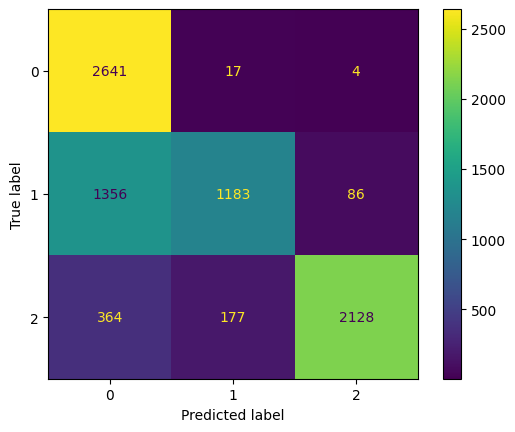

In [ ]:
# Let's set kernel = 'rbf', C = 0.1

svm_model = SVC(kernel='rbf', C=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVMClassification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### Experiment 8

SVM Accuracy: 0.9097536450477627
SVMClassification Report:
               precision    recall  f1-score   support

         NOT       0.84      0.92      0.88      2662
         TIN       0.91      0.81      0.86      2625
         UNT       0.99      1.00      0.99      2669

    accuracy                           0.91      7956
   macro avg       0.91      0.91      0.91      7956
weighted avg       0.91      0.91      0.91      7956



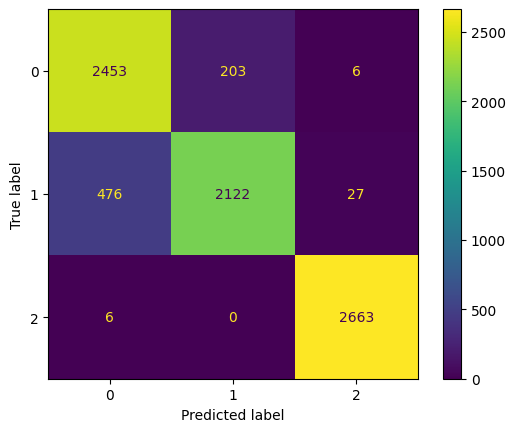

In [ ]:
# Let's set kernel = 'rbf', C = 10

final_svm_model = SVC(kernel='rbf', C=10, class_weight='balanced',probability=True)
final_svm_model.fit(X_train, y_train_encoded)
y_pred_encoded = final_svm_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print("SVMClassification Report:\n", classification_report(y_val, y_pred))

# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

# Finally, SVM model with the above Hyperparameters gives best accuracy compared to others.

### Ensemble Method (Best Model)

Ensemble Method (RF and SVM) Accuracy: 0.9170437405731523
Ensemble Method (RF and SVM) Classification Report:
               precision    recall  f1-score   support

         NOT       0.86      0.92      0.88      2662
         TIN       0.91      0.84      0.87      2625
         UNT       0.99      1.00      0.99      2669

    accuracy                           0.92      7956
   macro avg       0.92      0.92      0.92      7956
weighted avg       0.92      0.92      0.92      7956



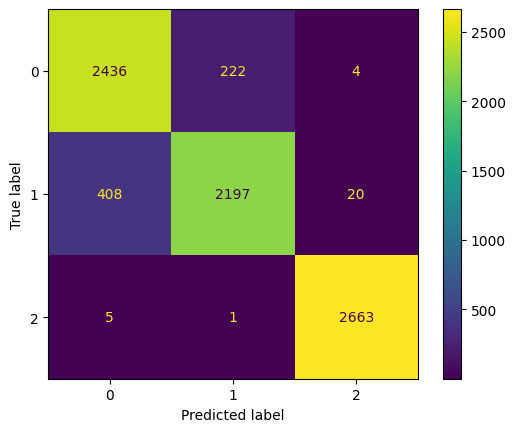

In [ ]:
# Now, let's also try Ensemble Method by combining SVM (with the best parameters model) and Randome Forest Classifier (As this gave 2nd best accuracy score).

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', final_svm_model)
], voting='soft')

ensemble_model.fit(X_train, y_train_encoded)
y_pred_encoded = ensemble_model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print("Ensemble Method (RF and SVM) Accuracy:", accuracy_score(y_val, y_pred))
print("Ensemble Method (RF and SVM) Classification Report:\n", classification_report(y_val, y_pred))
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_encoded, y_pred_encoded, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf_model.classes_)
disp.plot()
plt.show()

# Therefore, Ensemble Methodology worked and we got our best model with good accuracy score compared to others.

## **Testing Best Model with Test Dataset**

In [ ]:
tweets_test_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1wF8U43kzFWtSVntAw-pzR41No74sKjwG')
tweets_test_data.head()

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [ ]:
tweets_test_data.shape

(460, 2)

In [ ]:
tweets_test_data = tweets_test_data.dropna()
tweets_test_data.shape

(460, 2)

In [ ]:
# Tokenisation with tweet tokeniser.
tokeniser = TweetTokenizer(strip_handles=True, preserve_case=False)
tokenised_test_tweets = [tokeniser.tokenize(tweet) for tweet in tweets_test_data['tweet']]
tokenised_test_tweets_sentences = [' '.join(tokens) for tokens in tokenised_test_tweets]
tweets_test_data['processed_tweets'] = tokenised_test_tweets_sentences
tweets_test_data.head()

,id,tweet,processed_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...


In [ ]:
# Now Let's also try to convert words to their base form using WordNetLemmatizer with Parts-of-Speech.
pos_test_lemmatised_tweets = [[word_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet.split()] for tweet in tweets_test_data['processed_tweets']]
pos_lemmatised_test_tweets_sentences = [' '.join(tokens) for tokens in pos_test_lemmatised_tweets]
tweets_test_data['pos_lemmatized_tweets'] = pos_lemmatised_test_tweets_sentences
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...


In [ ]:
# Let's check if our tweets has these slangs or not.
# Apply function and count slang words
all_slang_words_test = sum(tweets_test_data['pos_lemmatized_tweets'].apply(find_slang_words), [])
slang_test_counts = Counter(all_slang_words_test)
print(slang_test_counts)

Counter({'u': 25, '$': 15, 'omg': 5, 'lol': 4, 'dm': 2, 'gal': 1, 'etc': 1, 'acct': 1, 'tho': 1, 'nsfw': 1, 'poc': 1, 'cia': 1, 'ie': 1, '£': 1, 'pm': 1, 'wtf': 1, 'ft': 1, 'pp': 1, 'hr': 1, 'lmao': 1, 'bbc': 1, 'mr': 1, 'ppl': 1})


In [ ]:
# Let's replace the slang words with the appropriate words.

slang_updated_test_tweets = [replace_slang(tweet, slang_dict) for tweet in tweets_test_data['pos_lemmatized_tweets']]
tweets_test_data['slang_updated_tweets'] = slang_updated_test_tweets
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets,slang_updated_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...


In [ ]:
# Now Let's re-check if all the slangs have been replaced or not.
all_slang_words_test = sum(tweets_test_data['slang_updated_tweets'].apply(find_slang_words), [])
slang_counts_test = Counter(all_slang_words_test)
print(slang_counts_test)

Counter()


In [ ]:
# Oops! We found few fancy words in our dataset, Let's try to convert them to normal words or else they'll create issues.
# Let's handle these words using Unicode Normalization method. We are converting these because, these fancyy words may seem similar, but they hold different unicode patterns.

normalized_fancy_test_tweets = [normalize_fancy_text(tweet) for tweet in tweets_test_data['slang_updated_tweets']]
tweets_test_data['normalized_fancy_tweets'] = normalized_fancy_test_tweets
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...


In [ ]:
# Let's remove punctuations.
import string

remove_punctuation_test = [text.translate(str.maketrans(dict.fromkeys(string.punctuation))) for text in tweets_test_data['normalized_fancy_tweets']]
tweets_test_data['normalized_fancy_tweets'] = remove_punctuation_test
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,whoisq wherestheserver dumpnike declasfisa dem...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h...",constitutionday be revere by conservative hat...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,foxnews nra maga potus trump 2ndamendment rnc ...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...,watching boomer get the news that she be still...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,nopasaran unity demo to oppose the farright i...


In [ ]:
# Let's remove emojis from the texts.

tweets_test_data['normalized_fancy_tweets'] = tweets_test_data['normalized_fancy_tweets'].apply(remove_emojis)
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,whoisq wherestheserver dumpnike declasfisa dem...
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h...",constitutionday be revere by conservative hat...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,foxnews nra maga potus trump 2ndamendment rnc ...
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...,watching boomer get the news that she be still...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,nopasaran unity demo to oppose the farright i...


In [ ]:
# Feature Extraction.
X_test = final_tfidf_vectorizer.transform(tweets_test_data['normalized_fancy_tweets'])

In [ ]:
# Predictions
predictions_encoded = ensemble_model.predict(X_test)

In [ ]:
labeled_preds = label_encoder.inverse_transform(predictions_encoded)

In [ ]:
# Creating prediction column in Test dataset

tweets_test_data['prediction'] = labeled_preds
tweets_test_data.head()

,id,tweet,processed_tweets,pos_lemmatized_tweets,slang_updated_tweets,normalized_fancy_tweets,prediction
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,whoisq wherestheserver dumpnike declasfisa dem...,TIN
1,27014,"#ConstitutionDay is revered by Conservatives, ...","#constitutionday is revered by conservatives ,...","#constitutionday be revere by conservative , h...","#constitutionday be revere by conservative , h...",constitutionday be revere by conservative hat...,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,#foxnews #nra #maga #potus #trump #2ndamendmen...,foxnews nra maga potus trump 2ndamendment rnc ...,NOT
3,13876,#Watching #Boomer getting the news that she is...,#watching #boomer getting the news that she is...,#watching #boomer get the news that she be sti...,#watching #boomer get the news that she be sti...,watching boomer get the news that she be still...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,#nopasaran : unity demo to oppose the far-righ...,nopasaran unity demo to oppose the farright i...,NOT


In [ ]:
tweets_test_data.drop(['tweet','processed_tweets','pos_lemmatized_tweets','slang_updated_tweets','normalized_fancy_tweets'],axis=1,inplace=True)
tweets_test_data.head()

,id,prediction
0,15923,TIN
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,NOT


In [ ]:
# Exporting the test predictions csv file.
tweets_test_data.to_csv('test_predictions.csv',index=False)